 # Exercise 6.5 Unsupervised Machine Learning
This Script contains the following Structure

1. Importing libraries
2. creating path and Importing Dataframe
3. Cleaning / verifying Dataframe for Clustering
4. Directions / Clustering 

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Creating path and Importing Dataframe

In [3]:
# creating path

path = r'C:\Users\stefa\Jupyter Analysis\14-04-2022 Achievement6'

In [4]:
# importing Dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'marketing_campaign.csv'), sep=';')

In [5]:
# Mathploblib known issue checkup with Version

matplotlib.__version__

'3.4.3'

# 3. Cleaning / Consistency Checks /Preparation of Data for Clustering

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.shape

(2240, 29)

In [9]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13.06.2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10.06.2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25.01.2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24.01.2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15.10.2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [10]:
# check for mixed Datatypes

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No mixed Datatypes have been found

In [11]:
# changing all columns to lowercase for easier coding

df.columns = df.columns.str.lower()

In [12]:
df.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [13]:
# For our Cluster Analysis we don't need the unique CSM ID 

df.drop('id',axis=1,inplace=True)

In [14]:
# missing values

df.isnull().sum()

year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [15]:
# 24 missing Values in the Income Colum, most likely not reported/submitted. We can drop this one

df = df.dropna()
print("we have {} missing values".format(df.isnull().sum().sum()))

we have 0 missing values


In [16]:
# Since kmeans can only handle Numerical Variables, checking for those and adjust before analysis

numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("we have {} numerical features out of {}".format(len(numerical_features),len(df.columns)))

we have 25 numerical features out of 28


In [17]:
df1 = df.describe()

In [18]:
df1

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
# Code to display all rows and columns in Datasets

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
columns= ['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']

In [21]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [22]:
# this will combine both the kids into a single columns kids for easier analysis

df['total_kids'] = df['kidhome']+df['teenhome']



In [23]:
columns

['year_birth',
 'education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'complain',
 'z_costcontact',
 'z_revenue',
 'response']

In [24]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,total_kids
0,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [25]:
# Removal of unwanted columns since k-mean can only handle numerical values

df = df.drop(columns = ['education', 'marital_status'])

In [26]:
# checking Datatypes

df.dtypes

year_birth               int64
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
total_kids               int64
dtype: object

In [27]:
# dt_customer is a datetame. changing type

df["dt_customer"] = pd.to_datetime(df["dt_customer"]).dt.date

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

# Outlier removal 

In [29]:
# We saw in initial tests already some outliers. Removing them now

In [30]:
df.head()

,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,total_kids
0,1957,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,1954,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,1984,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [31]:
# Creating Age Column for easier outlier removal 

df['age'] = 2022 -df['year_birth']

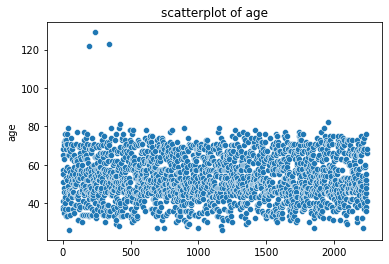

In [32]:
sns.scatterplot(data =df['age'])
plt.title('scatterplot of age');

Here we can see several points which are cleary outliers. For removal we can set Age 100 as maximum to cover all 

In [33]:
df[df['age']>100]

,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,total_kids,age
192,1900,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,1,122
239,1893,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,1,129
339,1899,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,0,123


In [34]:
# 3 points fit that criteria, decided to drop them

df = df.drop(df[df['age']>100].index)  # to remove the outliers

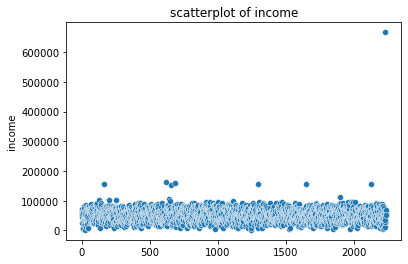

In [35]:
# Now checking obvious outliers on the income column

sns.scatterplot(data = df['income'])
plt.title('scatterplot of income');

There we have one obvious outlier at an income above 600k few points stick out above 100k, but they are not entirely outliers so i decided to let them stay.


In [36]:
#removal of income outlier

df = df.drop(df[df['income']>600000].index) 

In [37]:
# Combining purchases into single columns than rather having a lot, better interpretable

df['total_accep'] = df['acceptedcmp1'] + df['acceptedcmp2']+df['acceptedcmp3'] + df['acceptedcmp4']	+df['acceptedcmp5']	+df['response']

df['total_purchase'] = df['numdealspurchases']+df['numwebpurchases']+df['numcatalogpurchases']+df['numstorepurchases']

In [38]:
# checking columns before clusteriong with kmeans , dropping non numerical and unneccesary columns

In [39]:
df.head()

,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,total_kids,age,total_accep,total_purchase
0,1957,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,65,1,25
1,1954,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,68,0,6
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57,0,21
3,1984,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,38,0,8
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,41,0,19


In [40]:
df.drop(['year_birth','kidhome','teenhome','numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases','numwebvisitsmonth','acceptedcmp3',
         'acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','complain','z_costcontact','z_revenue','response'],axis=1,inplace=True)

In [41]:
df.head()

,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,total_kids,age,total_accep,total_purchase
0,58138.0,2012-04-09,58,635,88,546,172,88,88,0,65,1,25
1,46344.0,2014-08-03,38,11,1,6,2,1,6,2,68,0,6
2,71613.0,2013-08-21,26,426,49,127,111,21,42,0,57,0,21
3,26646.0,2014-10-02,26,11,4,20,10,3,5,1,38,0,8
4,58293.0,2014-01-19,94,173,43,118,46,27,15,1,41,0,19


In [42]:
# Instead of having Sales on different Products , combining them into a total 

df['total_amount__spent']= df['mntwines'] + df['mntfruits'] +df['mntmeatproducts'] +df["mntfishproducts"] +df['mntsweetproducts']+df['mntgoldprods']

In [43]:
# Dropping columns after combined Sales

df.drop(['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods'],axis=1,inplace=True)

In [44]:
df.head()

,income,dt_customer,recency,total_kids,age,total_accep,total_purchase,total_amount__spent
0,58138.0,2012-04-09,58,0,65,1,25,1617
1,46344.0,2014-08-03,38,2,68,0,6,27
2,71613.0,2013-08-21,26,0,57,0,21,776
3,26646.0,2014-10-02,26,1,38,0,8,53
4,58293.0,2014-01-19,94,1,41,0,19,422


In [45]:
df.drop(['dt_customer'],axis=1,inplace=True)

# 4. Clustering / Directions

In [46]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


[-1025434807289.4347,
 -319215121381.2538,
 -183132991222.4152,
 -122355522674.52254,
 -81081005932.23613,
 -53603159481.96934,
 -40125978704.581345,
 -31078331277.72326,
 -23862783174.69019]

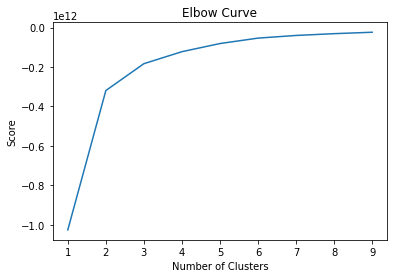

In [48]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this Elbow Curve we can see the last larger jump after Cluster 3. After that, the curve flattens out. The optimal count for our Clusters is 3

In [49]:
# Create the k-means object based on our Elbow Curve.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [50]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [51]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [52]:
df.head()

,income,recency,total_kids,age,total_accep,total_purchase,total_amount__spent,clusters
0,58138.0,58,0,65,1,25,1617,2
1,46344.0,38,2,68,0,6,27,2
2,71613.0,26,0,57,0,21,776,1
3,26646.0,26,1,38,0,8,53,0
4,58293.0,94,1,41,0,19,422,2


# Clusters Count Verification

In [53]:
df['clusters'].value_counts()

2    786
0    750
1    676
Name: clusters, dtype: int64

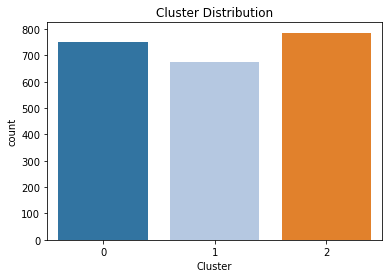

In [54]:
# we check the cluster counts and distribution visualized

sns.countplot(data=df, x="clusters", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

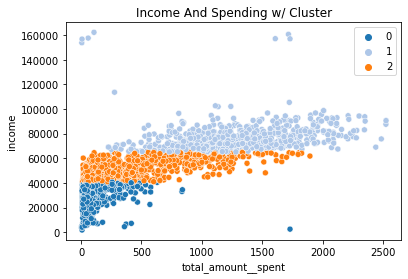

In [55]:
pl = sns.scatterplot(data = df,x=df["total_amount__spent"], y=df["income"],hue=df["clusters"], palette="tab20")
pl.set_title("Income And Spending w/ Cluster")
plt.legend()
plt.show()

Here we can see the income amount and the distribution in each clustergroup.

0 = low average income with total amount spended

2 = medium average income with total amount spended

1 = higher average income with total amount spended

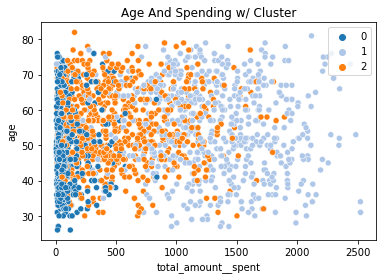

In [56]:
pl = sns.scatterplot(data = df,x=df["total_amount__spent"], y=df["age"],hue=df["clusters"], palette="tab20")
pl.set_title("Age And Spending w/ Cluster")
plt.legend()
plt.show()

Here we have a clear distribution of Age Groups compared with total amount Spent confirming our initial Cluster

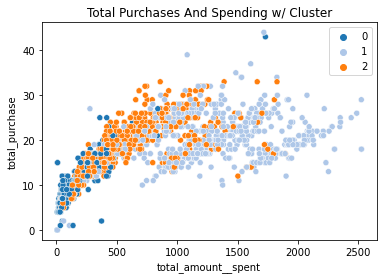

In [57]:
pl = sns.scatterplot(data = df,x=df["total_amount__spent"], y=df["total_purchase"],hue=df["clusters"], palette="tab20")
pl.set_title("Total Purchases And Spending w/ Cluster")
plt.legend()
plt.show()

And another Cluster showing the distribution of total amount spended and total purchases

In [58]:
df.columns

Index(['income', 'recency', 'total_kids', 'age', 'total_accep',
       'total_purchase', 'total_amount__spent', 'clusters'],
      dtype='object')

In [59]:
df.head()

,income,recency,total_kids,age,total_accep,total_purchase,total_amount__spent,clusters
0,58138.0,58,0,65,1,25,1617,2
1,46344.0,38,2,68,0,6,27,2
2,71613.0,26,0,57,0,21,776,1
3,26646.0,26,1,38,0,8,53,0
4,58293.0,94,1,41,0,19,422,2


In [74]:
df.groupby('clusters').agg({'income': ['mean', 'min', 'max'],
'recency': ['mean', 'min', 'max'],
'total_kids': ['mean', 'min', 'max'],
'age': ['mean', 'min', 'max'],
'total_accep': ['mean', 'min', 'max'],
'total_purchase': ['mean', 'min', 'max'],
'total_amount__spent':['mean', 'min', 'max']})

income                       recency         total_kids      \
                  mean      min       max       mean min max       mean min   
clusters                                                                      
0         28498.752000   1730.0   40590.0  48.606667   0  99   1.128000   0   
1         77137.843195  64950.0  162397.0  49.026627   0  99   0.431953   0   
2         52689.113232  40637.0   64892.0  49.407125   0  99   1.218830   0   

                    age         total_accep         total_purchase          \
         max       mean min max        mean min max           mean min max   
clusters                                                                     
0          3  48.886667  26  76    0.209333   0   3       7.945333   0  43   
1          3  54.409763  27  81    0.886095   0   5      20.860947   0  44   
2          3  55.955471  30  82    0.301527   0   4      16.385496   4  33   

         total_amount__spent            
                        mean min   max  
clusters                                
0                  96.042667   5  1730  
1                1287.331361   6  2525  
2                 510.189567  13  1895

For Exercise 6.5 as discussed with my tutor, i choose a different Dataset better suited for Clustering. In this Dataset we can see a clear Relation of Age, Income and Spending habits of customers which are related to each other. After checking all the Informations available we could identify Groups with low income and more Kids used to spend less which os logical as there is much less money available, compared to the high spender group with usually no children and high spending habits.